# Task 3 CUSTOMER CHURN PREDICTIONDevelop a model to predict customer churn for a subscription- based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_main_main = pd.read_csv("Churn_Modelling.csv")
dataset_main_main

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset_main_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset_main.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset_main = dataset_main.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
dataset_main

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset_main = pd.get_dummies(dataset_main,drop_first = True)
dataset_main.head()
dataset_main = dataset_main.astype(int)
dataset_main

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [9]:
dataset_main['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

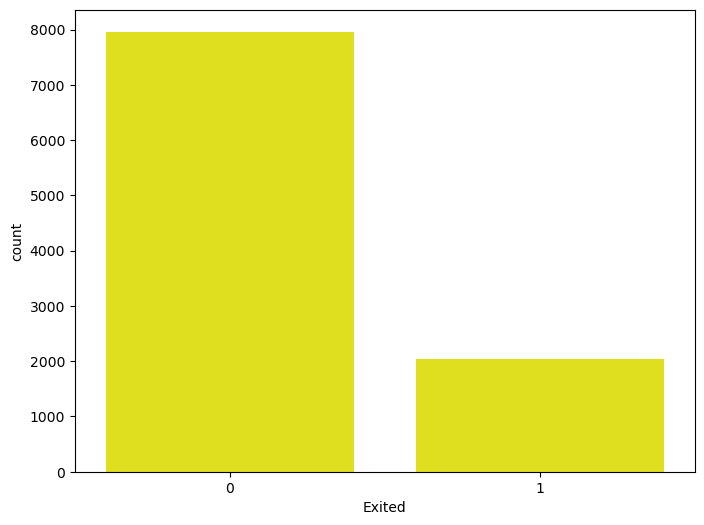

In [10]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = dataset_main,color='yellow')

In [15]:
X_main = dataset_main.drop('Exited',axis=1)
Y_main = dataset_main['Exited']

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_main, Y_main, test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 1.81978709, -1.2332269 ,  0.00233916, ..., -0.57542576,
        -0.57638802,  0.90842383],
       [-0.82028568, -1.90238089, -1.38383212, ...,  1.73784364,
        -0.57638802, -1.10080776],
       [-1.01777144,  0.39186136,  0.34888198, ...,  1.73784364,
        -0.57638802,  0.90842383],
       ...,
       [ 0.27108298,  0.10508107,  0.69542481, ..., -0.57542576,
         1.73494238,  0.90842383],
       [-1.16328726, -0.08610578,  0.34888198, ..., -0.57542576,
         1.73494238,  0.90842383],
       [-0.82028568,  0.00948765, -1.0372893 , ..., -0.57542576,
        -0.57638802, -1.10080776]])

# Logistic Regression

In [20]:
threshold = 0.5 
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, Y_train_classify)

LogisticRegression()

In [22]:
y_test_classified = [1 if value > threshold else 0 for value in Y_test]
accuracy_model1 = LR.score(X_test_scaled, y_test_classified) 
accuracy_model1

0.793

# SVM

In [23]:
from sklearn import svm
threshold = 0.5
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
svm = svm.SVC()
svm.fit(X_train_scaled, Y_train_classify)

SVC()

In [24]:
Y_train_classify = [1 if value > threshold else 0 for value in Y_test]
accuracy_model2 = svm.score(X_test_scaled, Y_train_classify)
accuracy_model2

0.8515

## Random Forest

In [25]:
threshold = 0.5
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
ranf = RandomForestClassifier()
ranf.fit(X_train_scaled, Y_train_classify)

RandomForestClassifier()

In [26]:
Y_test_classify = [1 if value > threshold else 0 for value in Y_test]
accuracy_model3 = ranf.score(X_test_scaled, Y_test_classify)
accuracy_model3

0.856

## Decision Tree Classifier

In [27]:
threshold = 0.5
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, Y_train_classify)

DecisionTreeClassifier()

In [29]:
Y_train_classified = [1 if value > threshold else 0 for value in Y_test]
accuracy_model4 = dt.score(X_test_scaled, Y_train_classified)
accuracy_model4

0.7795

## KNeighbours Classifier

In [30]:
threshold = 0.5
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, Y_train_classify)

KNeighborsClassifier()

In [31]:
Y_train_classify = [1 if value > threshold else 0 for value in Y_test]
accuracy_model5 = KNN.score(X_test_scaled, Y_train_classify)
accuracy_model5

0.8175

## Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
Y_train_classify = [1 if value > threshold else 0 for value in Y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, Y_train_classify)

GradientBoostingClassifier()

In [33]:
Y_train_classify = [1 if value > threshold else 0 for value in Y_test]
accuracy_model6 = GBC.score(X_test_scaled, Y_train_classify)
accuracy_model6

0.856

In [35]:
performance = pd.DataFrame({
    'Model':['LinearReg','svm','KN Classifier','dt','rf','GBC'],
    'Accuray':[accuracy_model_1,
           accuracy_model2,
           accuracy_model3,
           accuracy_model4,
           accuracy_model5,
           accuracy_model6
          ]
})
performance

,Model,Accuray
0,LinearReg,0.7930
1,svm,0.8515
2,KN Classifier,0.8560
3,dt,0.7795
4,rf,0.8175
5,GBC,0.8560
